# Q1 Sobel

## a)

In [1]:
# generate random matrix with size n*n
import numpy as np

def generateRandomMatrix(n):
    matrix = np.random.randint(0, 255, size=(n, n))
    return matrix

In [2]:
# write convolution function
def convolve(matrix, kernel):
    # get the size of matrix
    row = matrix.shape[0]
    col = matrix.shape[1]
    # get the size of kernel
    kernel_row = kernel.shape[0]
    kernel_col = kernel.shape[1]
    # get the size of output matrix
    output_row = row - kernel_row + 1
    output_col = col - kernel_col + 1
    # create output matrix
    output = np.zeros((output_row, output_col))
    # convolve
    for i in range(output_row):
        for j in range(output_col):
            output[i][j] = np.sum(matrix[i:i+kernel_row, j:j+kernel_col] * kernel)
    return output

In [3]:
# generate horizontal and vertical kernels
horizontal_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
vertical_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [4]:
# convolve the initial matrix with kernels
matrix = generateRandomMatrix(10)
horizontal = convolve(matrix, horizontal_kernel)
vertical = convolve(matrix, vertical_kernel)

In [5]:
# generate magnitude and direction matrixes
magnitude = np.sqrt(horizontal**2 + vertical**2)
direction = np.arctan2(vertical, horizontal)

## b)

In [6]:
# load image and convert it to gray scale
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/afshin.jpg')   
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
# define gaussian kernel (3*3)
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

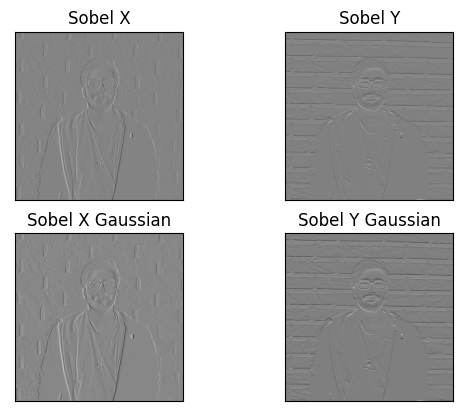

In [10]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
# without cv2
sobelx = convolve(gray, horizontal_kernel)
sobely = convolve(gray, vertical_kernel)
sobelx_gaussian = convolve(convolve(gray, gaussian_kernel), horizontal_kernel)
sobely_gaussian = convolve(convolve(gray, gaussian_kernel), vertical_kernel)

# plot the results
plt.subplot(2, 2, 1), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx_gaussian, cmap='gray')
plt.title('Sobel X Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely_gaussian, cmap='gray')
plt.title('Sobel Y Gaussian'), plt.xticks([]), plt.yticks([])
plt.show()

## c)

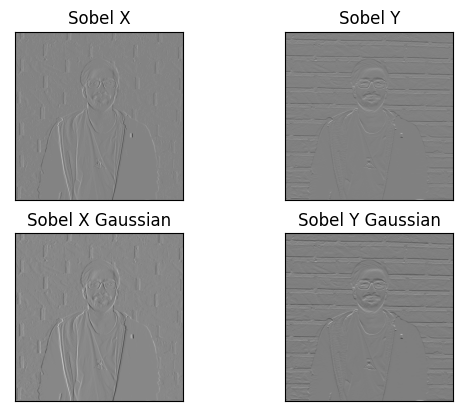

In [9]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
import cv2

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobelx_gaussian = cv2.Sobel(cv2.GaussianBlur(gray, (3, 3), 0), cv2.CV_64F, 1, 0, ksize=3)
sobely_gaussian = cv2.Sobel(cv2.GaussianBlur(gray, (3, 3), 0), cv2.CV_64F, 0, 1, ksize=3)

# plot the results
plt.subplot(2, 2, 1), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx_gaussian, cmap='gray')
plt.title('Sobel X Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely_gaussian, cmap='gray')
plt.title('Sobel Y Gaussian'), plt.xticks([]), plt.yticks([])
plt.show()